In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extraer datos de la fuente

games_data_raw = pd.read_csv('./datasets/games.csv')

In [3]:
games_data_raw.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
games_data_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [15]:
nullos_totales = games_data_raw.isna().sum()

In [16]:
print(nullos_totales)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [17]:
games_data_raw.columns = games_data_raw.columns.str.lower()

In [19]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [23]:
games_data_raw['year_of_release'] = games_data_raw['year_of_release'].fillna(0).astype('int')

In [24]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [25]:
games_data_raw.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [30]:
games_data_raw.loc[games_data_raw['user_score'] == 'tbd', 'user_score'] = np.nan

In [32]:
games_data_raw['user_score'] = games_data_raw['user_score'].astype('float')

In [33]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [34]:
games_data_raw['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [36]:
games_data_raw['total_sales'] = games_data_raw[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [37]:
games_data_raw['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [42]:
games_data_raw.nlargest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [49]:
analisis_anio_lanzamiento = games_data_raw.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

In [51]:
analisis_anio_lanzamiento = analisis_anio_lanzamiento[analisis_anio_lanzamiento['year_of_release'] != 0]

In [52]:
analisis_anio_lanzamiento

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


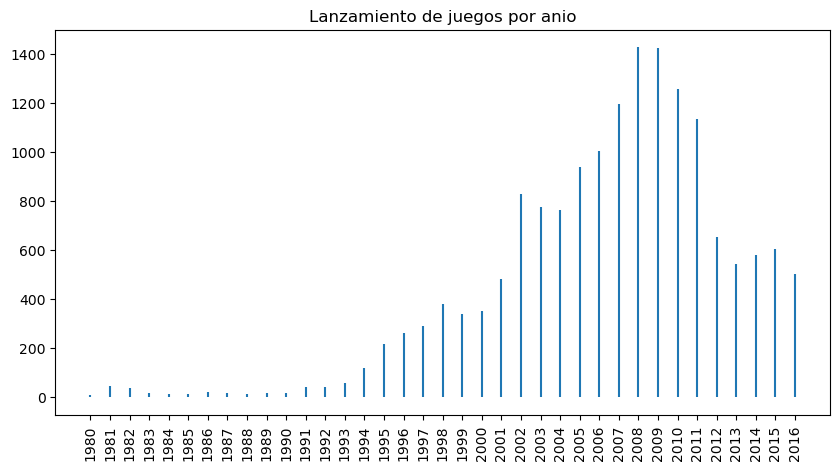

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
ax.vlines(x=analisis_anio_lanzamiento.year_of_release, ymin = 0, ymax=analisis_anio_lanzamiento.name)
ax.set_title('Lanzamiento de juegos por anio')
ax.set_xticks(analisis_anio_lanzamiento.year_of_release)
ax.set_xticklabels(analisis_anio_lanzamiento.year_of_release, rotation=90)
plt.show()

In [73]:
df_ventas_platforma = games_data_raw.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()

In [75]:
df_ventas_platforma['z_score'] = (df_ventas_platforma['total_sales'] - df_ventas_platforma['total_sales'].mean())/df_ventas_platforma['total_sales'].std()

In [76]:
df_ventas_platforma

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [79]:
df_ventas_platforma['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in df_ventas_platforma['z_score']]

In [80]:
df_ventas_platforma

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


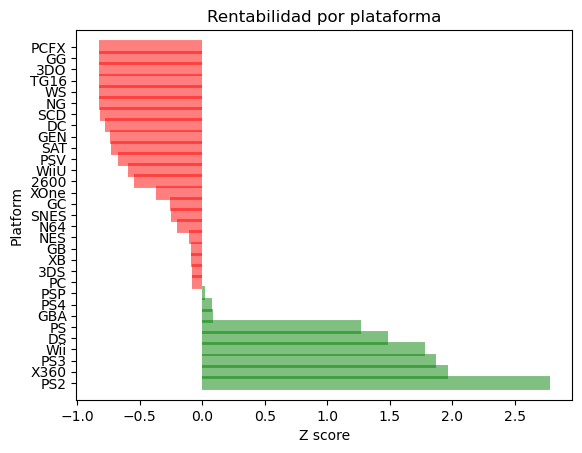

In [86]:
plt.figure()
plt.hlines(
    y=df_ventas_platforma.platform, xmin = 0, xmax=df_ventas_platforma.z_score, color=df_ventas_platforma.color, linewidth=10, alpha=0.5
)
plt.ylabel('Platform')
plt.xlabel('Z score')
plt.title('Rentabilidad por plataforma')
plt.show()

In [89]:
games_data_clean = games_data_raw.query('year_of_release >= 2013')

In [90]:
df_tiempo_de_vida = pd.pivot_table(games_data_clean, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

In [95]:
df_tiempo_de_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erickandrenaunay/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


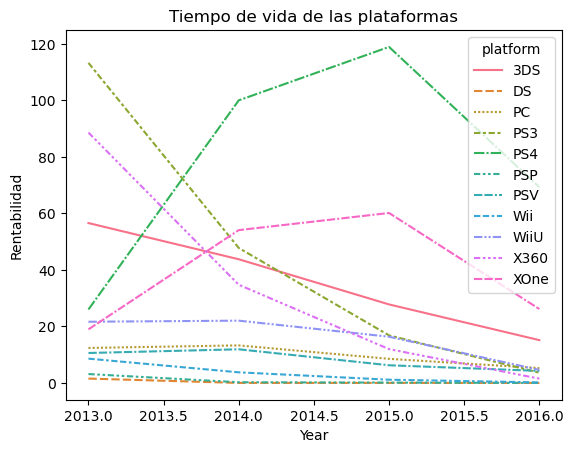

In [97]:
sns.lineplot(data=df_tiempo_de_vida)
plt.ylabel('Rentabilidad')
plt.xlabel('Year')
plt.title('Tiempo de vida de las plataformas')
plt.show()